### Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install opencv-python

### Prepare/collect data

In [2]:
import os
os.sys.path

path = os.listdir('brain_tumor/Training/')
classes = {'no_disease':0, 'pituitary_tumor':1, 'moderate_alzheimer': 2}

In [3]:

import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1, 2])

In [6]:
pd.Series(Y).value_counts()

0    1397
1     827
2     495
dtype: int64

In [7]:

X.shape, X_updated.shape

((2719, 200, 200), (2719, 40000))

### Visualize data

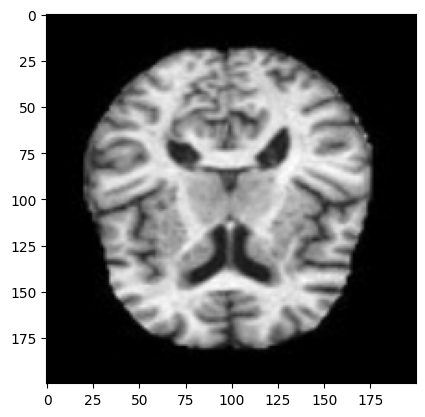

In [8]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2719, 40000)

### Split Data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((2175, 40000), (544, 40000))

### Feature Scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255


print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


255 0
255 0
1.0 0.0
1.0 0.0


### Train Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression()
lg.fit(xtrain, ytrain)

LogisticRegression()

In [15]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [16]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9816176470588235


In [17]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9926436781609196
Testing Score: 0.9761029411764706


### Prediction

In [18]:
pred = sv.predict(xtest)

In [19]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 51, 200, 235, 275, 351, 413, 437, 443, 465, 501, 502, 505, 518]),)

In [20]:
print("Total Misclassified Samples: ",len(misclassified[0]))
#print(pred[36],ytest[36])

Total Misclassified Samples:  13


### TEST MODEL

In [21]:
dec = {0:'No Disease', 1:'Positive Tumor', 2:'Positive Alzheimer'}

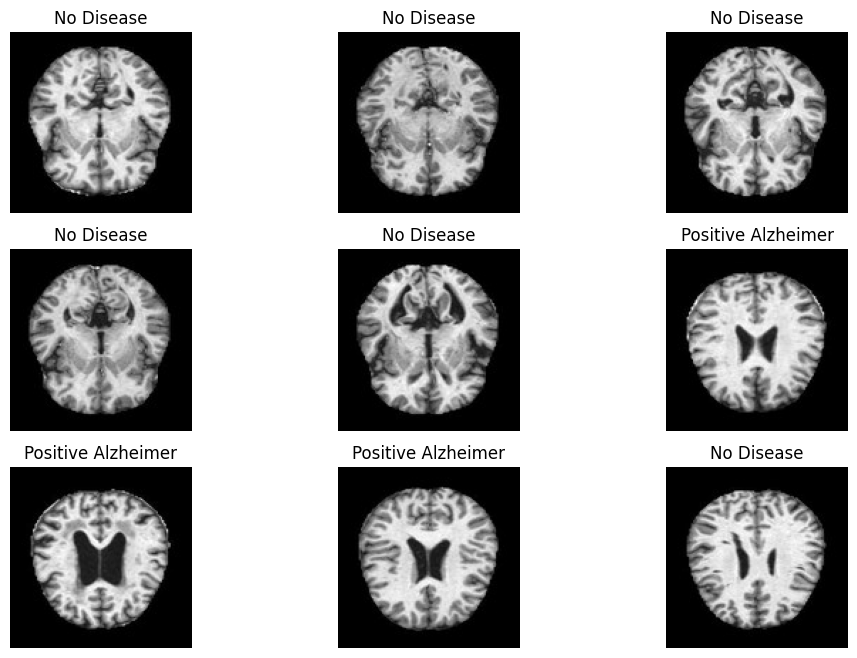

In [22]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_disease/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_disease/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
   


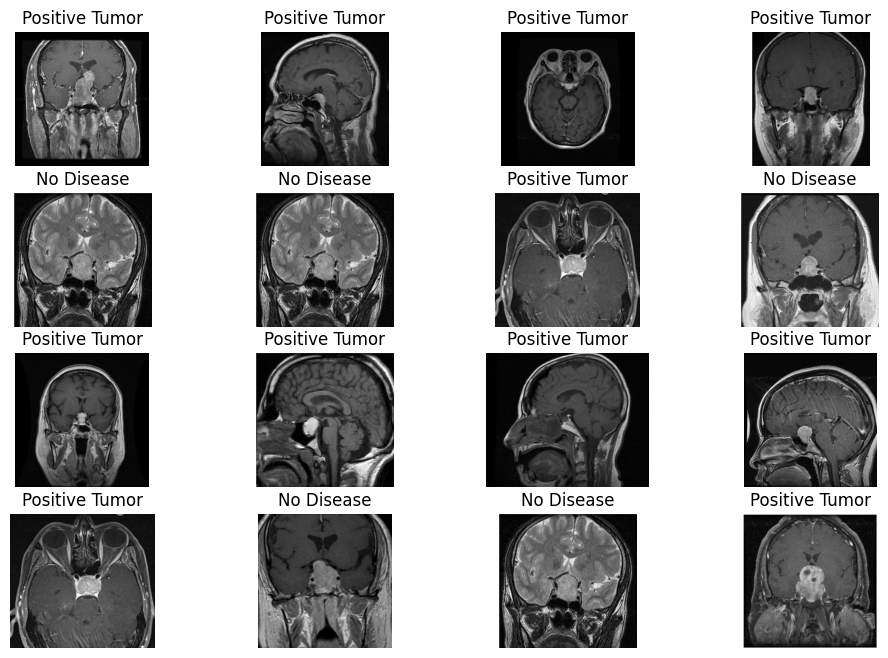

In [23]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

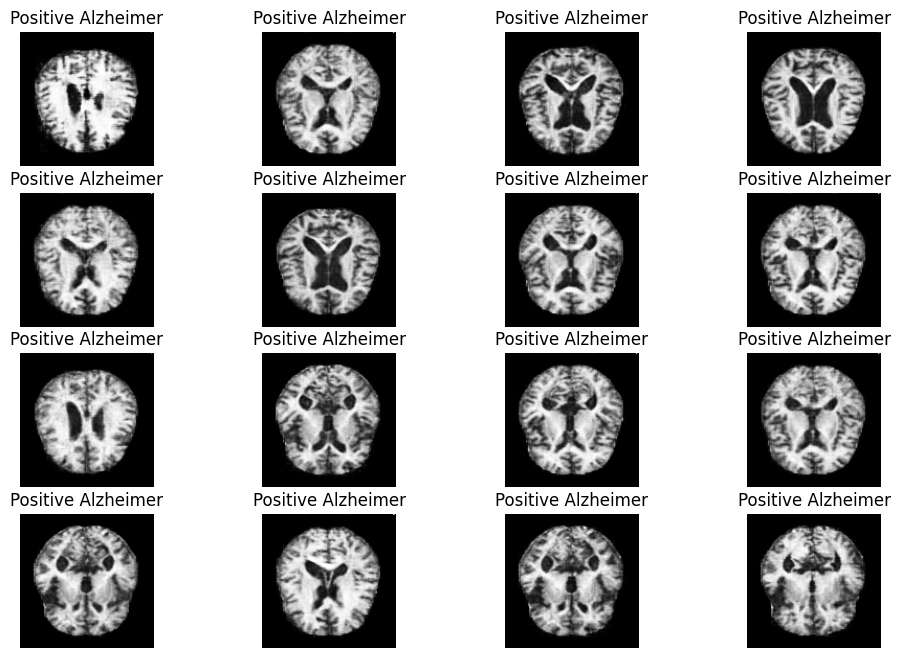

In [24]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/moderate_test/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/moderate_test/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1